In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Increase display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [31]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [33]:
print("Customers Dataset Overview:")
print(customers.info())
print(customers.head(), "\n")
#for customers displaying basic info

Customers Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 



In [23]:
print("Products Dataset Overview:")
print(products.info())
print(products.head(), "\n")

Products Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category  Price
0      P001     ActiveWear Biography        Books 169.30
1      P002    ActiveWear Smartwatch  Electronics 346.30
2      P003  ComfortLiving Biography        Books  44.12
3      P004            BookWorld Rug   Home Decor  95.69
4      P005          TechPro T-Shirt     Clothing 429.31 



In [34]:

print("Transactions Dataset Overview:")
print(transactions.info())
print(transactions.head(), "\n")

Transactions Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070 

In [35]:
#cleaning  of the dataset all three
# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Check for missing values
print("Missing Values in Customers:\n", customers.isnull().sum(), "\n")
print("Missing Values in Products:\n", products.isnull().sum(), "\n")
print("Missing Values in Transactions:\n", transactions.isnull().sum(), "\n")

# Remove duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Check for duplicate removal
print(f"Duplicates removed. Customers: {len(customers)}, Products: {len(products)}, Transactions: {len(transactions)}")



Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 

Duplicates removed. Customers: 200, Products: 100, Transactions: 1000


C:\Users\DELL\AppData\Local\Temp\ipykernel_19680\1842321384.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")


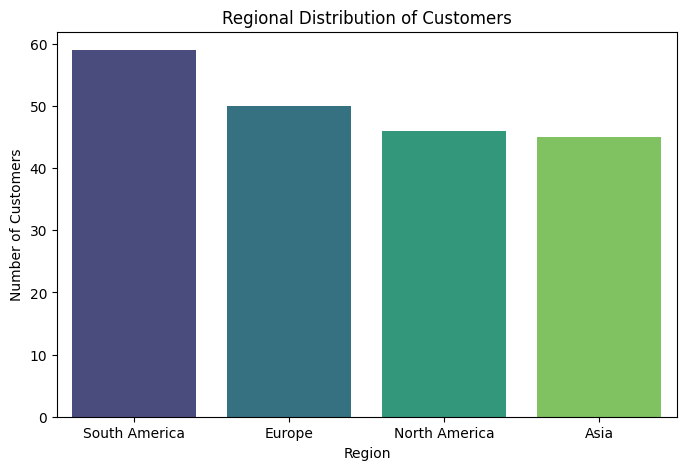

In [36]:
# Initial EDA
# Regional distribution of customers
region_distribution = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")
plt.title("Regional Distribution of Customers")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19680\4285190939.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="coolwarm")


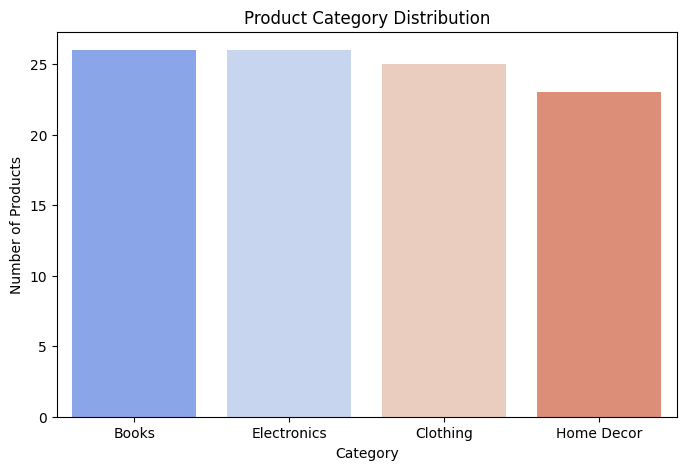

In [37]:
# Most popular product categories
category_distribution = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="coolwarm")
plt.title("Product Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19680\3728192640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="mako")


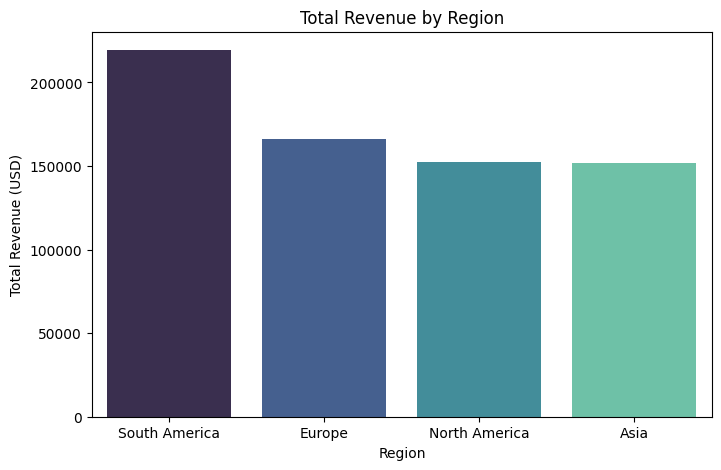

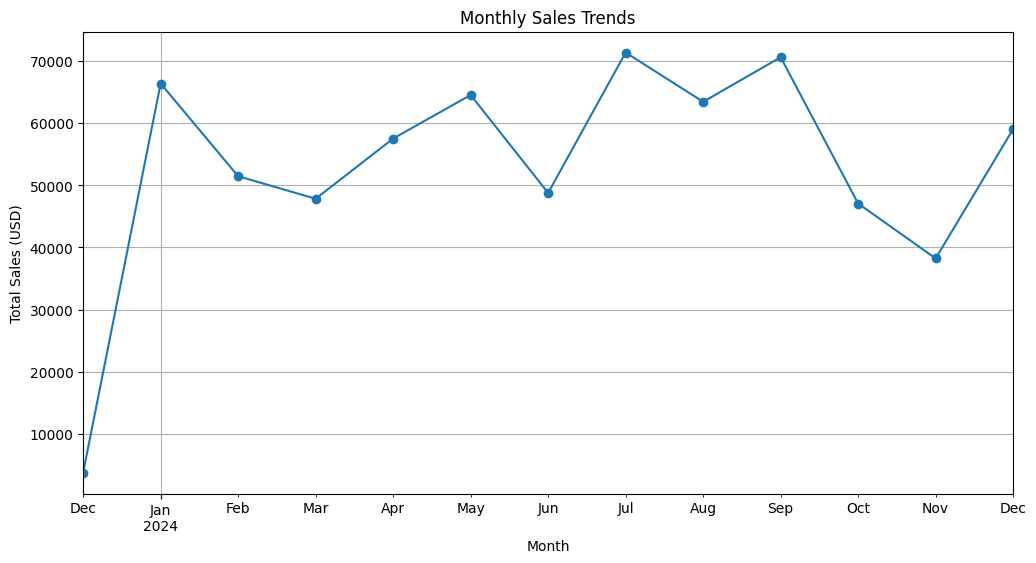

In [38]:
# Total revenue by region
transactions = transactions.merge(customers, on='CustomerID', how='left')
transactions = transactions.merge(products, on='ProductID', how='left')
revenue_by_region = transactions.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="mako")
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.show()

# Sales trends over time
sales_trends = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_trends.index = sales_trends.index.to_timestamp()  # Convert to Timestamp for plotting
plt.figure(figsize=(12, 6))
sales_trends.plot(kind='line', marker='o')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()
